# Tanzania - Cloud Filtered Mosaics

In [1]:
# Supress Warning 
import warnings
warnings.filterwarnings('ignore')
import datacube
dc = datacube.Datacube(app = 'my_app', config = '/home/localuser/.datacube.conf')

In [2]:
import utils.data_cube_utilities.data_access_api as dc_api  
api = dc_api.DataAccessApi(config = '/home/localuser/.datacube.conf')

# Select one of the cubes ... Landsat-7 or Landsat-8

In [3]:
# platform = "LANDSAT_7"
# product = "ls7_ledaps_tanzania"

platform = "LANDSAT_8"
product = "ls8_lasrc_tanzania"

In [4]:
# Print extents of the Data Cube
extents = api.get_full_dataset_extent(platform = platform, product = product)

latitude_extents = (min(extents['latitude'].values),max(extents['latitude'].values))
longitude_extents = (min(extents['longitude'].values),max(extents['longitude'].values))
time_extents = (min(extents['time'].values),max(extents['time'].values))

print(time_extents)
print(latitude_extents)
print(longitude_extents)

(numpy.datetime64('2013-04-12T07:52:20.000000000'), numpy.datetime64('2018-01-01T07:21:24.000000000'))
(-11.999019059879926, -0.0001356388440351325)
(28.998784571651935, 40.99806659404953)


# Visualize Data Cube Region

In [5]:
## The code below renders a map that can be used to orient yourself with the region.
from utils.data_cube_utilities.dc_display_map import display_map
display_map(latitude = latitude_extents, longitude = longitude_extents)

# Select a smaller region for your analysis and the time extent

In [6]:
time_extents = ('2017-01-01', '2018-01-01')

# ITISO Region
# latitude_extents = (-5.899, -5.365)
# longitude_extents = (35.665, 36.317)

# PAHI Region
# latitude_extents = (-4.966, -4.394)
# longitude_extents = (35.783, 36.353)

# Dodoma Region
latitude_extents = (-6.227, -6.136)
longitude_extents = (35.702, 35.804)

In [7]:
display_map(latitude = latitude_extents, longitude = longitude_extents)

## Load the dataset and the required spectral bands or other parameters

In [8]:
landsat_dataset = dc.load(latitude = latitude_extents,
                          longitude = longitude_extents,
                          platform = platform,
                          time = time_extents,
                          product = product,
                          measurements = ['red', 'green', 'blue', 'nir', 'swir1', 'swir2', 'pixel_qa']) 

In [9]:
landsat_dataset

<xarray.Dataset>
Dimensions:    (latitude: 337, longitude: 377, time: 22)
Coordinates:
  * time       (time) datetime64[ns] 2017-01-10T07:44:33 ... 2017-12-28T07:44:33
  * latitude   (latitude) float64 -6.136 -6.136 -6.136 ... -6.227 -6.227 -6.227
  * longitude  (longitude) float64 35.7 35.7 35.7 35.7 ... 35.8 35.8 35.8 35.8
Data variables:
    red        (time, latitude, longitude) int16 4346 4239 4088 ... 2492 2580
    green      (time, latitude, longitude) int16 4110 4022 3858 ... 2206 2244
    blue       (time, latitude, longitude) int16 3997 3878 3700 ... 2024 2067
    nir        (time, latitude, longitude) int16 5000 4940 4826 ... 3103 3180
    swir1      (time, latitude, longitude) int16 4808 4795 4713 ... 2555 2626
    swir2      (time, latitude, longitude) int16 4083 4090 3979 ... 2225 2276
    pixel_qa   (time, latitude, longitude) int32 480 480 480 480 ... 992 992 992
Attributes:
    crs:      EPSG:4326

>### Masking out Clouds

In [10]:
import xarray as xr  
import numpy as np

In [11]:
from utils.data_cube_utilities.clean_mask import landsat_qa_clean_mask
cloud_mask = landsat_qa_clean_mask(landsat_dataset, platform=platform)
cleaned_dataset = landsat_dataset.where(cloud_mask)


> **Median Mosaic**  
>  Masks clouds from imagery using the median valued cloud-free pixels in the time series  

In [12]:
from utils.data_cube_utilities.dc_mosaic import create_median_mosaic
median_composite = create_median_mosaic(cleaned_dataset, cloud_mask)

In [13]:
from utils.data_cube_utilities.dc_rgb import rgb

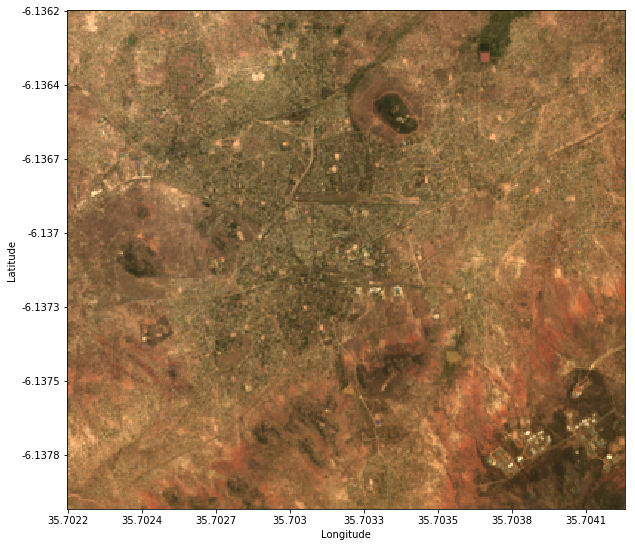

In [14]:
rgb(median_composite)
# rgb(median_composite, bands = ["nir","swir1","blue"])

> **Most Recent Mosaic**  
>  Masks clouds from imagery using the most recent cloud-free pixels in the time series  

In [15]:
from utils.data_cube_utilities.dc_mosaic import create_mosaic
most_recent_composite = create_mosaic(cleaned_dataset, cloud_mask)

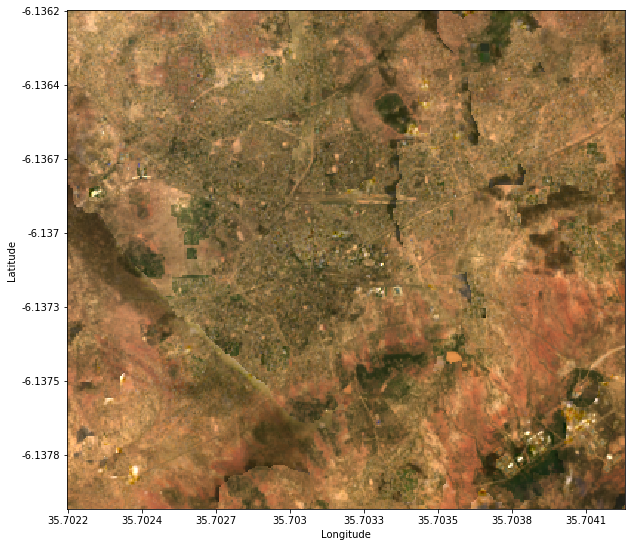

In [16]:
rgb(most_recent_composite)

> **Max NDVI Mosaic**  
>  Masks clouds from imagery using the Max NDVI across time for cloud-free pixels in the time series  

In [17]:
from utils.data_cube_utilities.dc_mosaic import create_max_ndvi_mosaic
max_ndvi_composite = create_max_ndvi_mosaic(cleaned_dataset, xr.DataArray(cloud_mask))

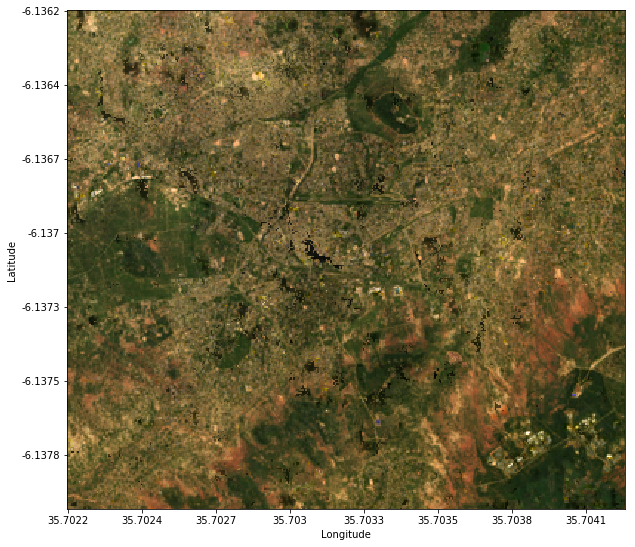

In [18]:
rgb(max_ndvi_composite)
# rgb(max_ndvi_composite, bands = ["nir","swir1","blue"])

>### Export to GeoTIFF

In [19]:
# from utils.data_cube_utilities.import_export import export_slice_to_geotiff

In [20]:
# export_slice_to_geotiff(median_composite, 'geotiffs/DEMO_L7_median_composite_2005.tif')

In [21]:
# export_slice_to_geotiff(most_recent_composite, 'geotiffs/DEMO_L7_most_recent_composite.tif')

In [22]:
# export_slice_to_geotiff(max_ndvi_composite, 'geotiffs/sample_max_ndvi_composite.tif')

In [23]:
!ls -lah geotiffs/

total 92K
drwxrwxr-x  3 localuser localuser  60K Oct 25 01:01 .
drwxrwxrwx 20 localuser localuser  28K Nov 10 05:55 ..
drwxrwxr-x  2 localuser localuser 4.0K May 22 00:38 .ipynb_checkpoints
